Cirrosis Prediction Dataset

In [7]:
#from sklearn.model_selection import train_test_split
#X_train, X_test = train_test_split(data, test_size=0.2, random_state=42)
#X_train.to_csv("/Users/anastasiakurakova/Desktop/Data/cirrhosis_train.csv", encoding='utf-8', index=False)
#X_test.to_csv("/Users/anastasiakurakova/Desktop/Data/cirrhosis_test.csv", encoding='utf-8', index=False)

Splitting the data into training and testing

In [2]:
import pandas as pd
data = pd.read_csv('/Users/anastasiakurakova/Desktop/Data/cirrhosis/cirrhosis_train.csv')
X_test = X_test = pd.read_csv("/Users/anastasiakurakova/Desktop/Data/cirrhosis/cirrhosis_test.csv")

In [3]:
len(X_test)

56

220 elements used for training

In [4]:
len(data)

220

In [70]:
data.head(10)

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,0,1186,D,D-penicillamine,21004,M,N,Y,N,N,2.1000,221.0000,3.7300,237.0000,903.3000,145.5200,114.0000,122.0000,11.7000,4.0000
1,1,3681,C,D-penicillamine,12687,F,N,N,N,N,1.1000,507.0000,3.7000,43.0000,919.8000,87.8100,139.0000,227.0000,10.4000,1.0000
2,2,2592,D,D-penicillamine,18050,F,N,Y,N,S,1.1000,362.0000,3.7200,168.0000,"1,598.5000",189.7700,186.0000,231.0000,12.5000,4.0000
3,3,1249,D,D-penicillamine,18108,F,N,Y,N,N,6.7000,407.0000,3.4400,184.0000,981.8000,238.4000,123.0000,371.0000,10.9000,2.0000
4,4,3167,D,Placebo,19809,F,N,Y,N,N,0.5000,304.0000,3.7000,75.0000,943.0000,135.4900,108.0000,188.0000,10.8000,3.0000
5,5,1823,D,D-penicillamine,19458,F,N,N,N,N,1.1000,252.0000,3.6900,116.0000,"1,257.3000",121.7000,98.0000,196.0000,11.6000,2.0000
6,6,696,D,D-penicillamine,21624,F,N,Y,N,N,1.7000,482.0000,2.9900,250.0000,"1,749.1000",165.4200,219.0000,259.0000,10.0000,2.0000
7,7,2971,C,D-penicillamine,23893,F,N,Y,N,N,1.2000,377.0000,3.6300,75.0000,496.1000,89.8400,141.0000,138.0000,11.0000,4.0000
8,8,985,CL,Placebo,12809,M,N,Y,N,N,6.8000,264.0000,3.5700,298.0000,960.5000,102.4100,165.0000,186.0000,10.3000,2.0000
9,9,41,D,D-penicillamine,21492,M,Y,Y,N,N,5.4000,238.0000,3.3000,237.0000,"1,461.8000",170.8000,136.0000,215.0000,11.6000,4.0000


CTGAN is a part of Synthetic Data Vault.

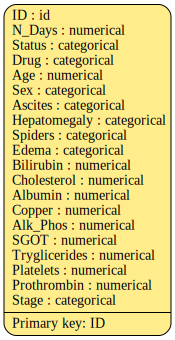

In [3]:
from sdv.single_table import CTGANSynthesizer
from sdv.metadata import SingleTableMetadata

metadata = SingleTableMetadata()
metadata.detect_from_dataframe(data)
metadata.visualize()

In [4]:
%%time
ctgan = CTGANSynthesizer(metadata, epochs=3500, verbose=True)
ctgan.fit(data)
loss_values = ctgan.get_loss_values()


Gen. (-1.22) | Discrim. (-0.10): 100%|██████████| 3500/3500 [02:24<00:00, 24.30it/s]

CPU times: user 2min 11s, sys: 1min 1s, total: 3min 13s
Wall time: 2min 26s


In [5]:
import plotly.express as px

loss_values_reformatted = pd.melt(
    loss_values,
    id_vars=['Epoch'],
    var_name='Loss Type'
)

fig = px.line(loss_values_reformatted, x="Epoch", y="value", color="Loss Type", title='Epoch vs. Loss')
fig.show()

In [6]:
# Sample Data equal to the size of the training set
samples = ctgan.sample(len(data))
samples.head(10)

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,0,2035,D,D-penicillamine,22929,M,N,Y,N,N,2.6,386.0,3.58,183.0,1645.3,202.17,89.0,260.0,10.4,3.0
1,1,4194,C,Placebo,13910,F,N,N,N,N,1.4,501.0,3.63,71.0,1771.3,54.99,95.0,424.0,9.7,3.0
2,2,1259,C,D-penicillamine,22290,F,N,N,Y,S,0.9,453.0,3.30,86.0,1943.8,91.65,79.0,268.0,13.1,4.0
3,3,711,D,D-penicillamine,22953,F,N,Y,N,N,4.2,470.0,3.28,46.0,2400.5,152.21,99.0,415.0,10.2,3.0
4,4,3278,C,Placebo,11909,F,N,N,N,N,1.8,280.0,4.04,71.0,652.1,94.83,68.0,454.0,10.2,3.0
5,5,910,C,Placebo,14494,F,N,N,N,N,0.5,292.0,3.73,105.0,1628.6,93.62,79.0,409.0,9.8,3.0
6,6,2008,C,Placebo,24464,F,N,Y,N,N,0.7,167.0,3.48,58.0,2010.7,72.73,33.0,311.0,10.2,2.0
7,7,592,D,D-penicillamine,19407,F,N,Y,N,N,21.8,307.0,3.29,112.0,2118.3,457.25,324.0,338.0,11.1,4.0
8,8,735,CL,D-penicillamine,12964,F,N,N,N,N,2.8,264.0,3.74,210.0,1188.0,127.41,84.0,275.0,11.4,3.0
9,9,41,D,D-penicillamine,25456,M,Y,Y,N,Y,3.9,262.0,3.19,113.0,1473.5,93.84,69.0,126.0,10.4,4.0


In [9]:
#samples.to_csv("/Users/anastasiakurakova/Desktop/Data/Synthetic Data/TSTR/synthetic_cirrhosis_ctgan_TSTR.csv", encoding='utf-8', index=False)

In [7]:
# Checking for duplicates between original and synthetic datasets

common_duplicates = pd.merge(X_test, samples, how='inner')
new = common_duplicates.drop_duplicates()
# Print the common duplicate rows
print("Common Duplicate Rows:")
print(common_duplicates)
print(new)

Common Duplicate Rows:
Empty DataFrame
Columns: [ID, N_Days, Status, Drug, Age, Sex, Ascites, Hepatomegaly, Spiders, Edema, Bilirubin, Cholesterol, Albumin, Copper, Alk_Phos, SGOT, Tryglicerides, Platelets, Prothrombin, Stage]
Index: []
Empty DataFrame
Columns: [ID, N_Days, Status, Drug, Age, Sex, Ascites, Hepatomegaly, Spiders, Edema, Bilirubin, Cholesterol, Albumin, Copper, Alk_Phos, SGOT, Tryglicerides, Platelets, Prothrombin, Stage]
Index: []


### Using Synthetic Data Vault Library for Evaluation

In [9]:
from sdv.evaluation.single_table import run_diagnostic, evaluate_quality

diagnostic = run_diagnostic(
    real_data=X_test,
    synthetic_data=synthetic_data,
    metadata=metadata
)

quality_report = evaluate_quality(
    X_test,
    synthetic_data,
    metadata
)

Generating report ...
  0%|          | 0/20 [00:00<?, ?it/s]

(2/2) Evaluating Column Pair Trends: : 100%|██████████| 190/190 [00:00<00:00, 204.99it/s]

Overall Score: 85.89%

Properties:
- Column Shapes: 90.0%
- Column Pair Trends: 81.77%


In [10]:
quality_report.get_details('Column Shapes')

,Column,Metric,Score
0,N_Days,KSComplement,0.930195
1,Status,TVComplement,0.918182
2,Drug,TVComplement,0.946104
3,Age,KSComplement,0.860390
4,Sex,TVComplement,0.952922
5,Ascites,TVComplement,0.974351
6,Hepatomegaly,TVComplement,0.959416
7,Spiders,TVComplement,0.972403
8,Edema,TVComplement,0.956818
9,Bilirubin,KSComplement,0.894156


### Calculate Range Coverage and KSComplement for Numerical Variables

In [14]:
from sdmetrics.single_column import RangeCoverage, KSComplement
for i in ['Bilirubin','Albumin']:
  range_cov = RangeCoverage.compute(
      real_data=X_test[i],
      synthetic_data=samples[i]
  )
  ks = KSComplement.compute(
      real_data=X_test[i],
      synthetic_data=samples[i]
  )
  print(f"Range coverage for {i} is: {range_cov}")
  print(f"KSComplement for {i} is: {ks}")

Range coverage for Bilirubin is: 0.8844765342960289
KSComplement for Bilirubin is: 0.7525974025974026
Range coverage for Albumin is: 0.9754601226993864
KSComplement for Albumin is: 0.8246753246753247


### Calculate Category Coverage and TVComplement for Categorical Variables

In [15]:

from sdmetrics.single_column import CategoryCoverage, TVComplement
for i in ['Status','Stage']:
  cat_cov = CategoryCoverage.compute(
    real_data=X_test[i],
    synthetic_data=samples[i]
  )
  tv = TVComplement.compute(
      real_data=X_test[i],
      synthetic_data=samples[i]
  )
  print(f"Category coverage for {i} is: {cat_cov}")
  print(f"TVComplement for {i} is: {tv}")

Category coverage for Status is: 1.0
TVComplement for Status is: 0.8902597485505565
Category coverage for Stage is: 1.0
TVComplement for Stage is: 0.9055194805194805


### Using Table Evaluator for Evaluation

(56, 20) (220, 20)


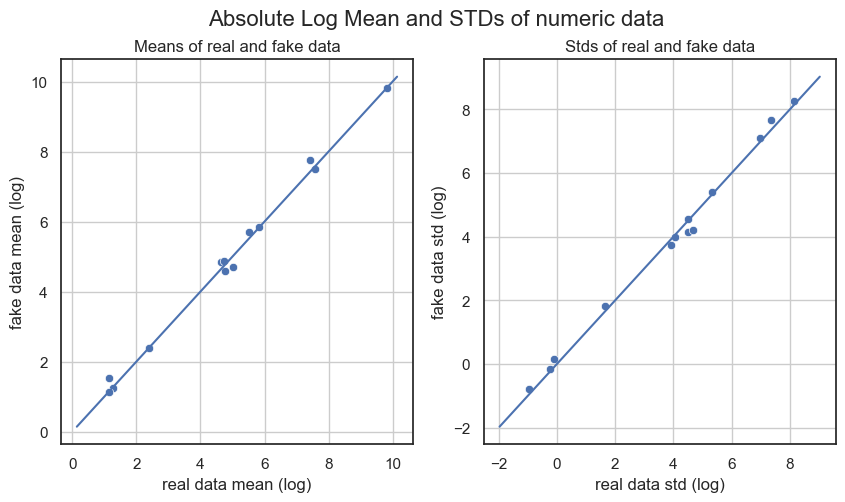

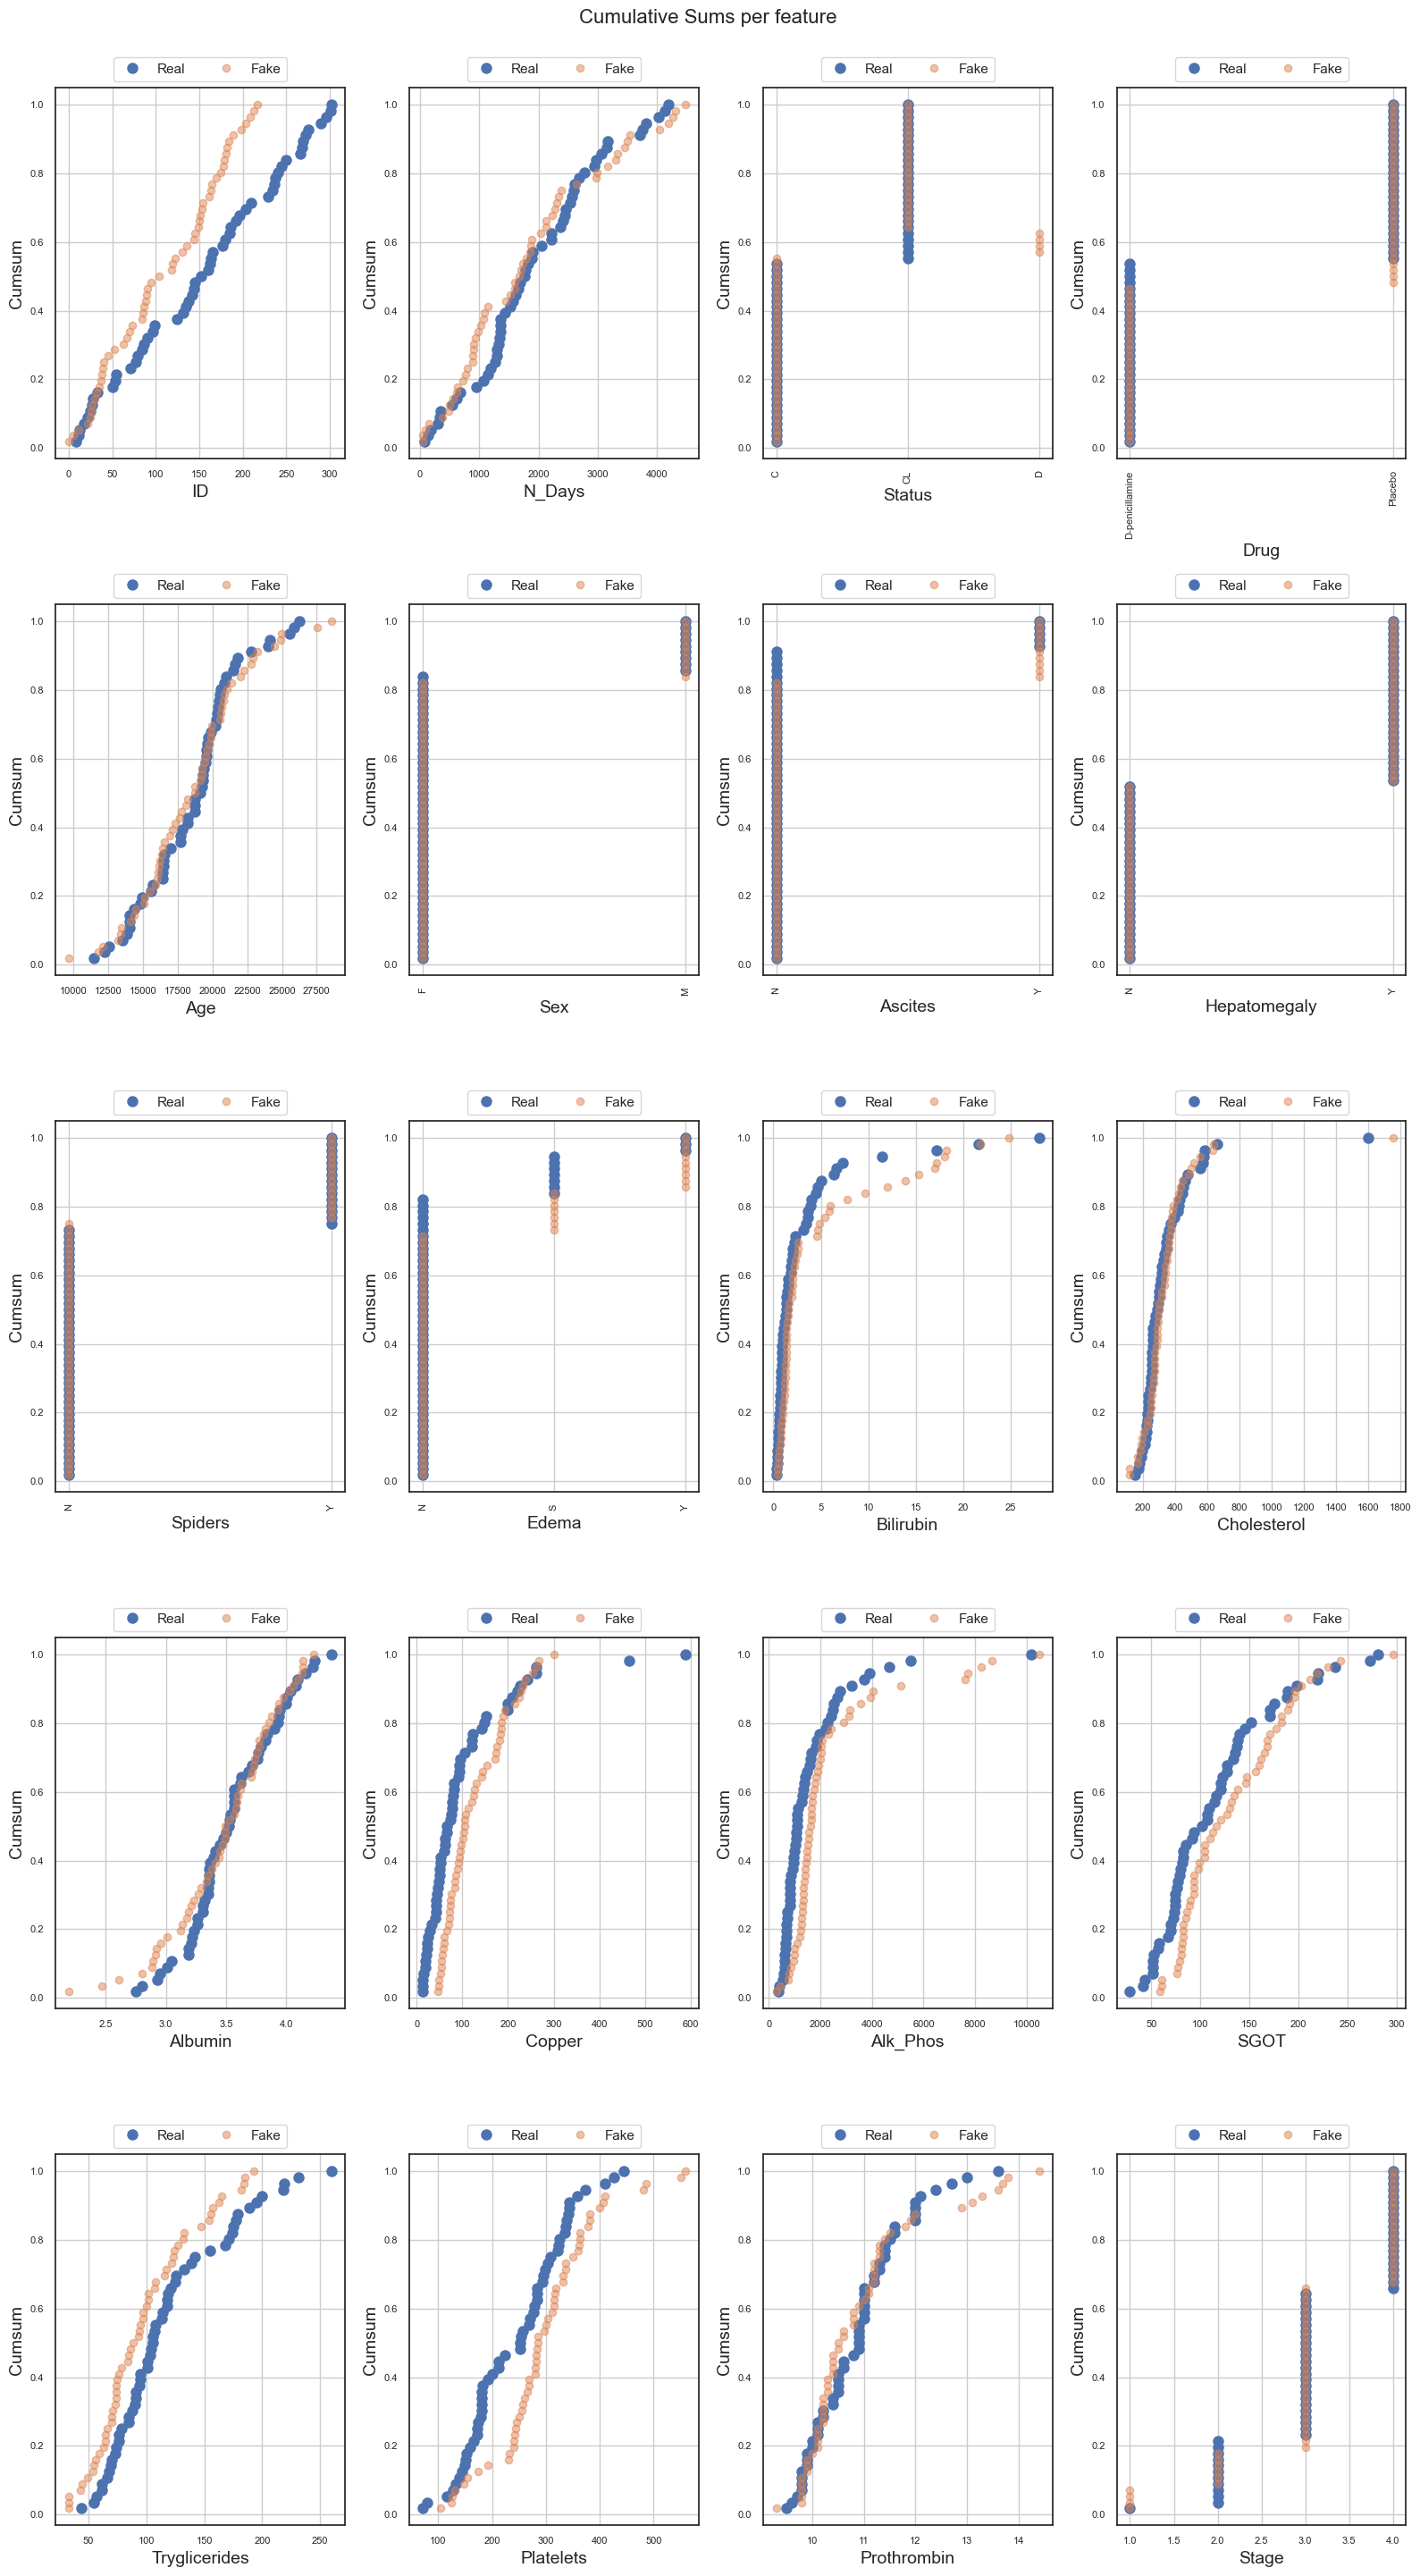

/Users/anastasiakurakova/miniconda3/envs/ml/lib/python3.11/site-packages/table_evaluator/table_evaluator.py:182: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

/Users/anastasiakurakova/miniconda3/envs/ml/lib/python3.11/site-packages/table_evaluator/table_evaluator.py:182: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

/Users/anastasiakurakova/miniconda3/envs/ml/lib/python3.11/site-packages/table_evaluator/table_evaluator.py:182: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

/Users/anastasiakurakova/miniconda3/envs/ml/lib/python3.11/site-packages/table_evaluator/table_evaluator.py:182: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

/Users/anastasiakurakova/min

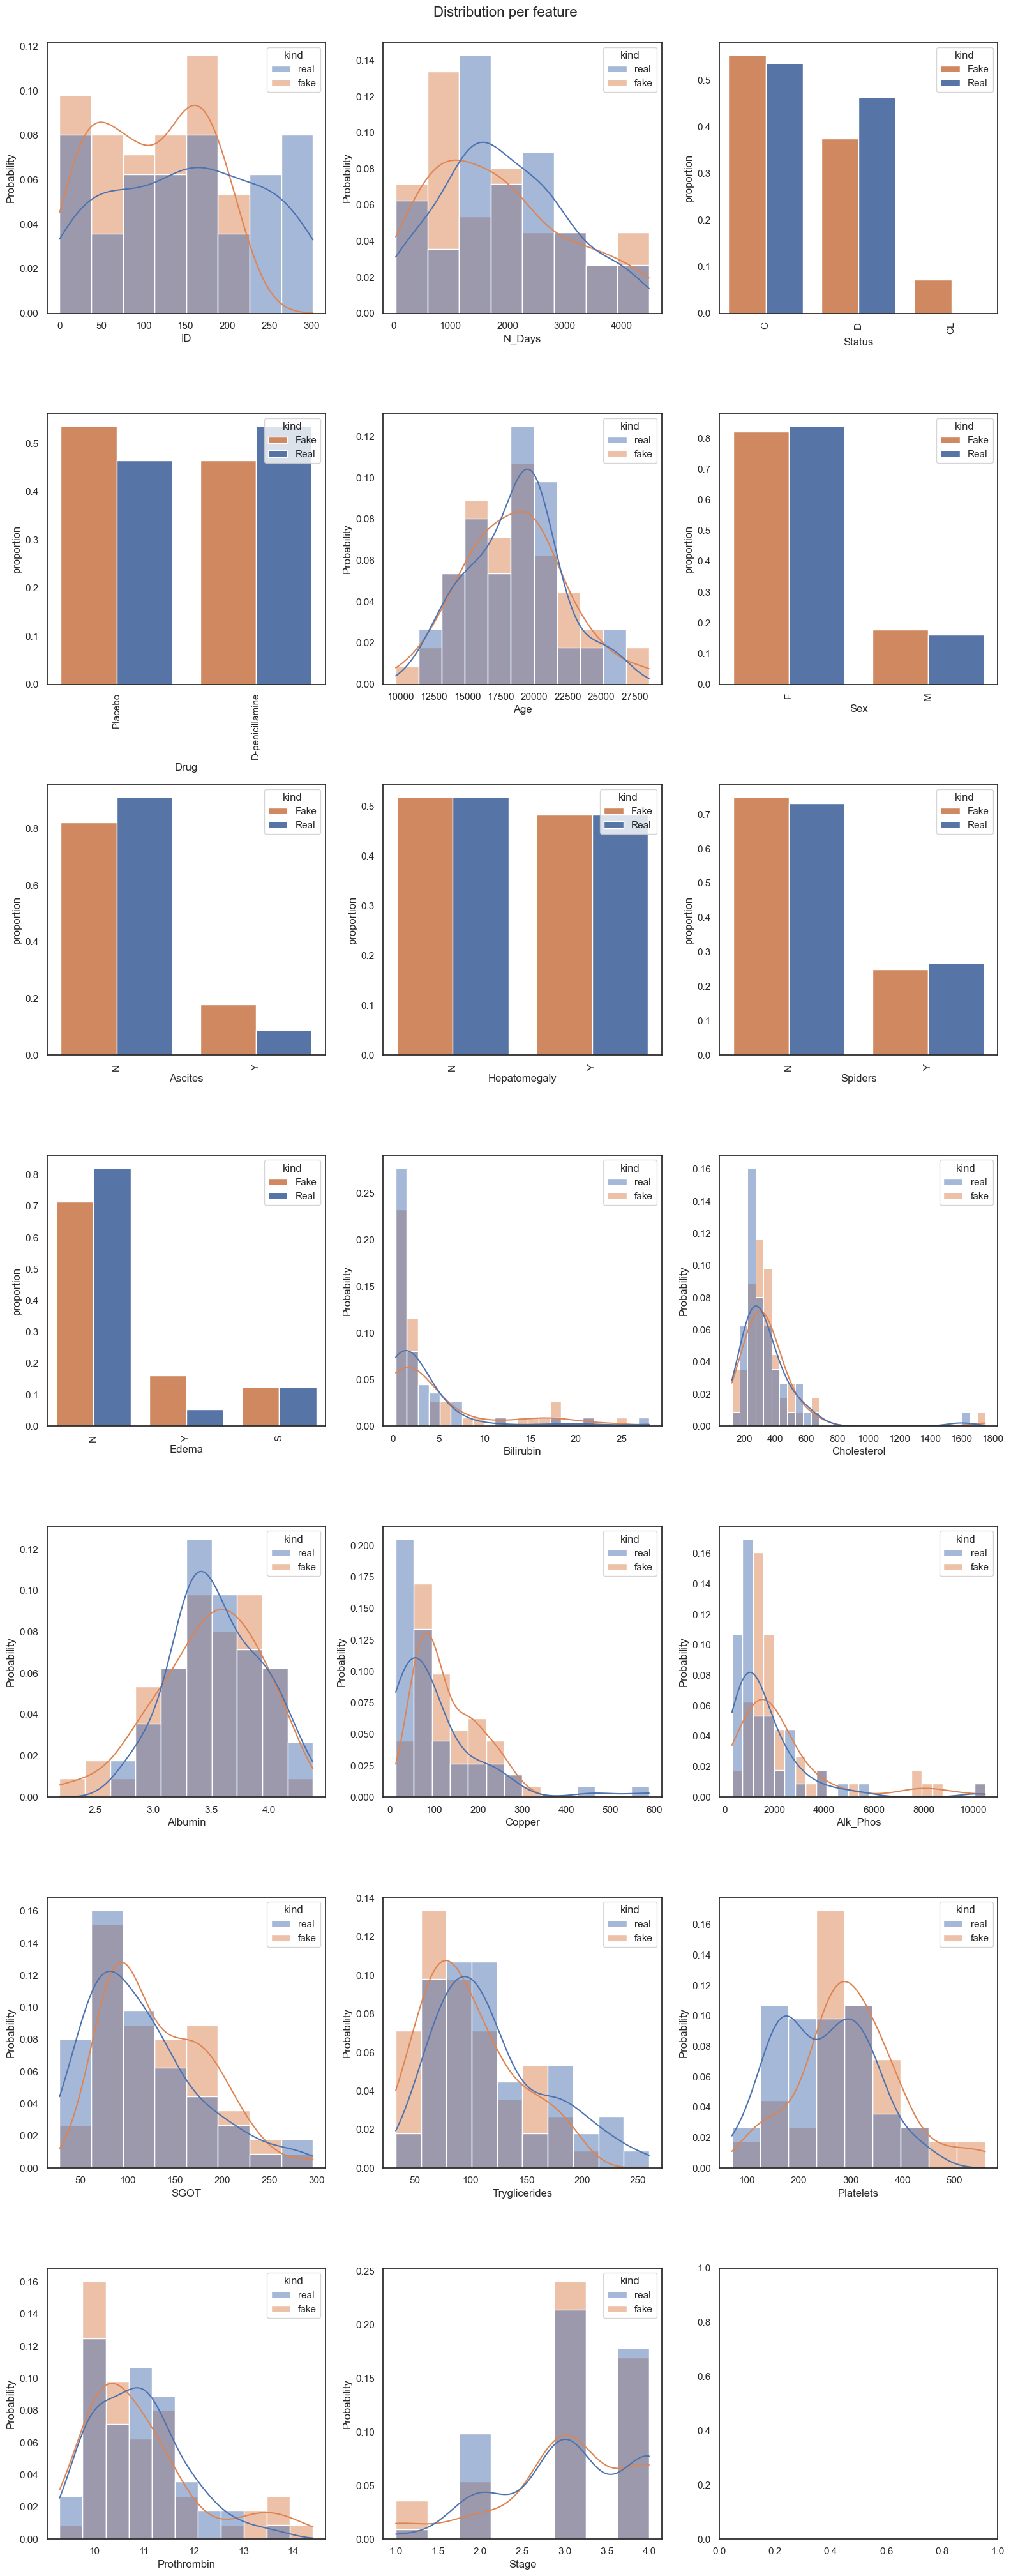

/Users/anastasiakurakova/miniconda3/envs/ml/lib/python3.11/site-packages/dython/nominal.py:704: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.

/Users/anastasiakurakova/miniconda3/envs/ml/lib/python3.11/site-packages/dython/nominal.py:705: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.

/Users/anastasiakurakova/miniconda3/envs/ml/lib/python3.11/site-packages/dython/nominal.py:704: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.

/Users/anastasiakurakova/miniconda3/envs/ml/lib/python3.11/site-packages/dython

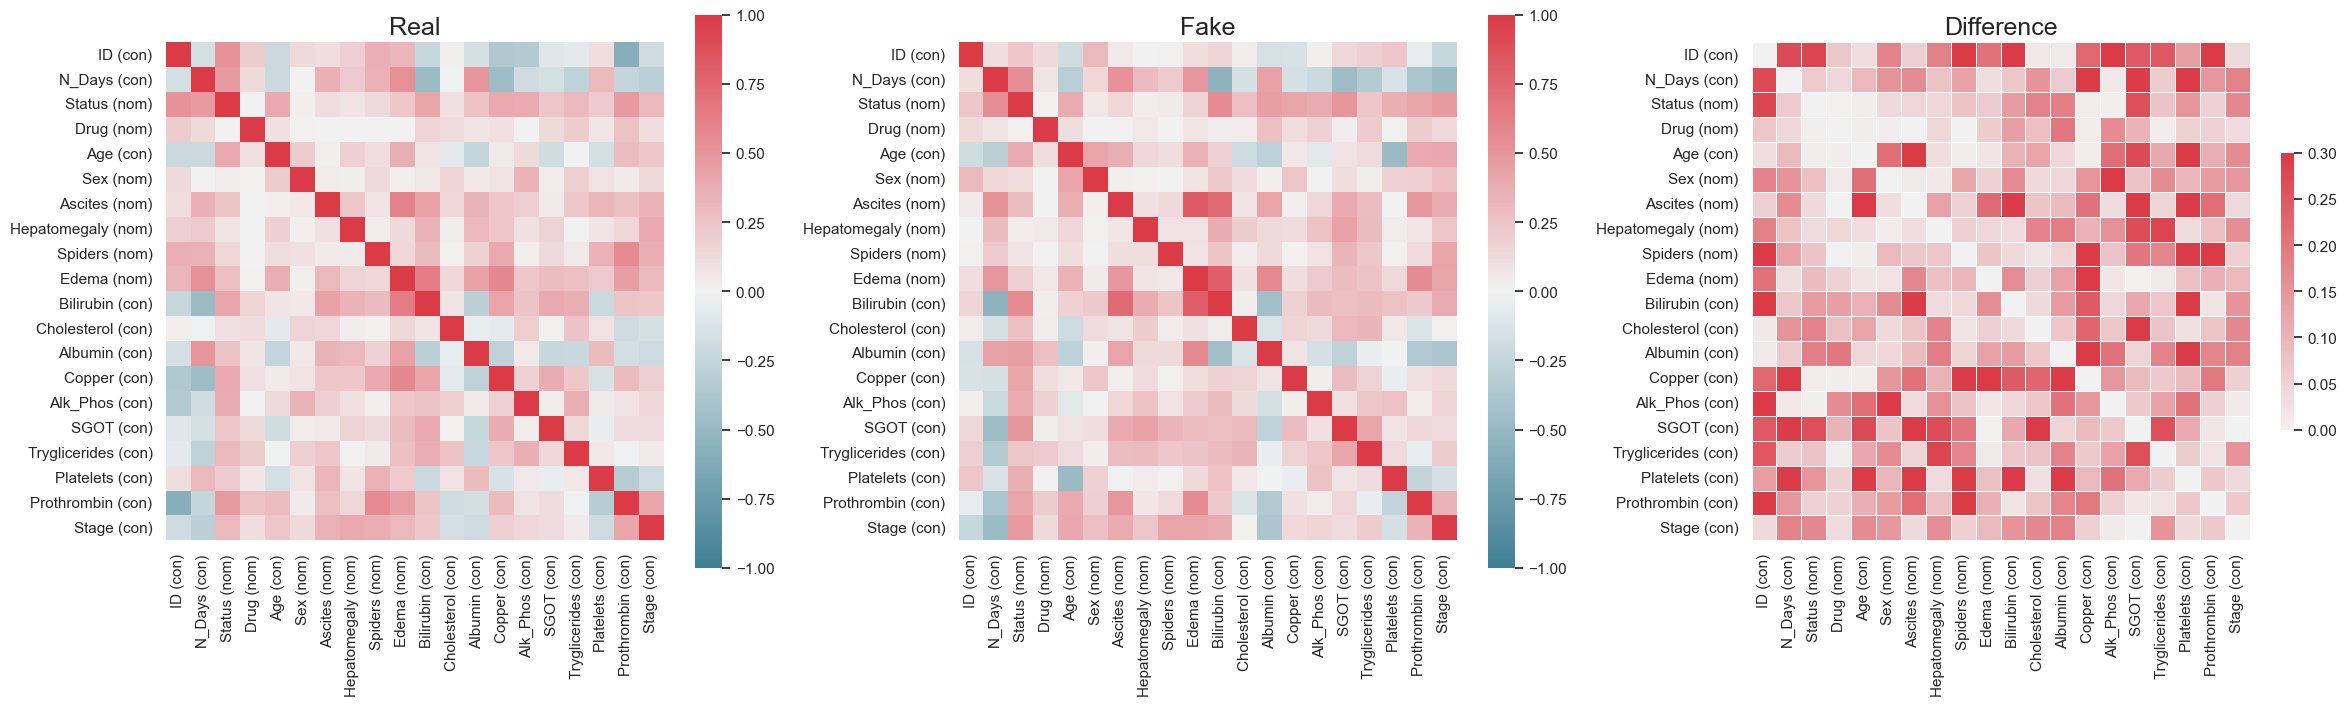

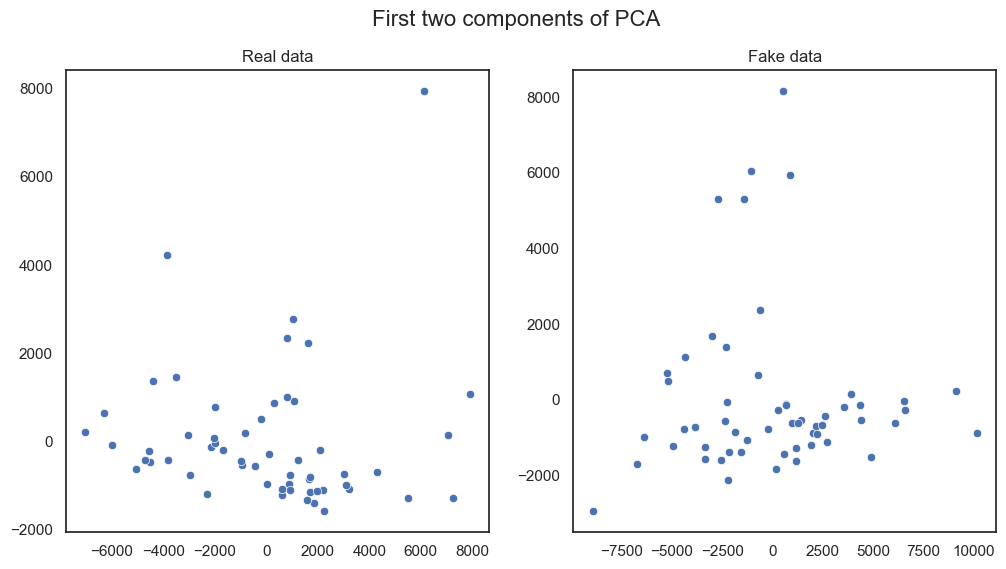

In [12]:
from table_evaluator import TableEvaluator
print(X_test.shape,samples.shape)
table_evaluator = TableEvaluator(X_test,samples)
table_evaluator.visual_evaluation()

In [13]:
table_evaluator.evaluate(target_col='Status')

/Users/anastasiakurakova/miniconda3/envs/ml/lib/python3.11/site-packages/dython/nominal.py:704: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.

/Users/anastasiakurakova/miniconda3/envs/ml/lib/python3.11/site-packages/dython/nominal.py:705: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.

/Users/anastasiakurakova/miniconda3/envs/ml/lib/python3.11/site-packages/dython/nominal.py:704: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.

/Users/anastasiakurakova/miniconda3/envs/ml/lib/python3.11/site-packages/dython


Classifier F1-scores and their Jaccard similarities::
                             f1_real  f1_fake  jaccard_similarity
index                                                            
DecisionTreeClassifier_fake   0.2500   0.6667              0.2632
DecisionTreeClassifier_real   0.5000   0.6667              0.2000
LogisticRegression_fake       0.2500   0.5833              0.0909
LogisticRegression_real       1.0000   0.4167              0.2632
MLPClassifier_fake            0.5000   0.3333              0.0000
MLPClassifier_real            0.9167   0.0000              0.0000
RandomForestClassifier_fake   0.3333   0.8333              0.2000
RandomForestClassifier_real   0.7500   0.6667              0.4118

Privacy results:
                                         result
Duplicate rows between sets (real/fake)  (0, 0)
nearest neighbor mean                    3.1094
nearest neighbor std                     0.6120

Miscellaneous results:
                                  Result
Column Cor

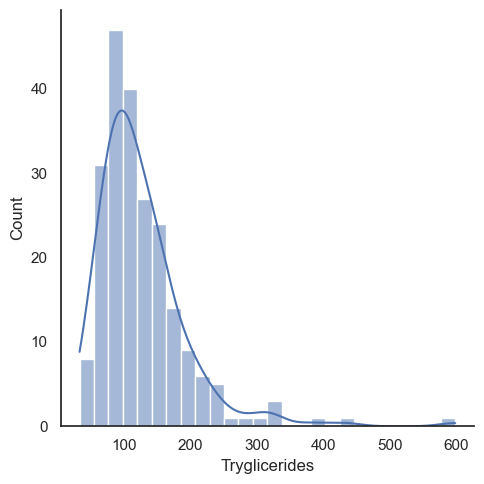

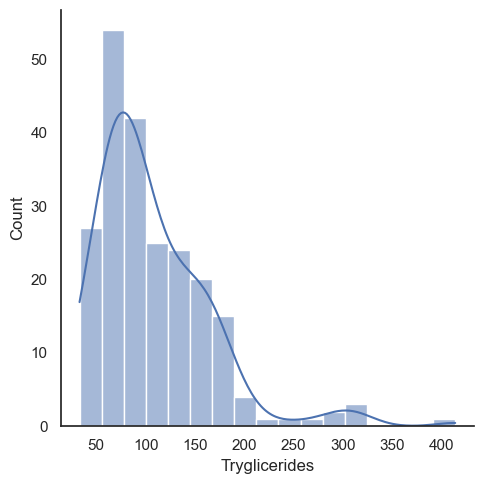

In [16]:
import seaborn as sns
sns.displot(data['Tryglicerides'], kde=True)
sns.displot(samples['Tryglicerides'], kde=True)


Looking at Wasserstein Distance and KL Divergence

In [21]:
from scipy.stats import wasserstein_distance
wasserstein_distances = {}
for column in X_test.columns[10:]:
    wasserstein_dist = wasserstein_distance(X_test[column], samples[column])
    wasserstein_distances[column] = wasserstein_dist
# Print Wasserstein distances for each feature
for column, distance in wasserstein_distances.items():
    print(f'Comparing Testing data and Synthetic Data {column}: {distance}')


Comparing Testing data and Synthetic Data Bilirubin: 1.8712662337662342
Comparing Testing data and Synthetic Data Cholesterol: 32.671428571428514
Comparing Testing data and Synthetic Data Albumin: 0.10149675324675325
Comparing Testing data and Synthetic Data Copper: 46.290909090909096
Comparing Testing data and Synthetic Data Alk_Phos: 1296.923766233766
Comparing Testing data and Synthetic Data SGOT: 20.612577922077914
Comparing Testing data and Synthetic Data Tryglicerides: 16.2038961038961
Comparing Testing data and Synthetic Data Platelets: 56.104220779220775
Comparing Testing data and Synthetic Data Prothrombin: 0.1727272727272727
Comparing Testing data and Synthetic Data Stage: 0.09448051948051941


In [22]:
wasserstein_distances = {}
for column in X_test.columns[10:]:
    wasserstein_dist = wasserstein_distance(X_test[column], data[column])
    wasserstein_distances[column] = wasserstein_dist
# Print Wasserstein distances for each feature
for column, distance in wasserstein_distances.items():
    print(f'Comparing Testing data and Training Data {column}: {distance}')

Comparing Testing data and Training Data Bilirubin: 0.6394480519480523
Comparing Testing data and Training Data Cholesterol: 40.025974025974
Comparing Testing data and Training Data Albumin: 0.07491233766233764
Comparing Testing data and Training Data Copper: 13.235714285714295
Comparing Testing data and Training Data Alk_Phos: 443.8344155844153
Comparing Testing data and Training Data SGOT: 14.910636363636364
Comparing Testing data and Training Data Tryglicerides: 10.212337662337656
Comparing Testing data and Training Data Platelets: 21.6775974025974
Comparing Testing data and Training Data Prothrombin: 0.24383116883116884
Comparing Testing data and Training Data Stage: 0.10681818181818184


In [23]:
# Calculate KL Divergence for each feature
from scipy.stats import entropy
kl_divergences = {}
for column in X_test.columns[10:]:
    kl_divergence = entropy(X_test[column], samples[:len(X_test)][column])
    kl_divergences[column] = kl_divergence

# Print KL Divergences for each feature
for column, divergence in kl_divergences.items():
    print(f'{column}: {divergence}')

Bilirubin: 1.4989044747783682
Cholesterol: 0.21121821322358708
Albumin: 0.011349284168201669
Copper: 0.5003671747039512
Alk_Phos: 0.764137537395353
SGOT: 0.22118896024087684
Tryglicerides: 0.24386344228111517
Platelets: 0.1266097027820039
Prothrombin: 0.007838131713594154
Stage: 0.07758877112810664


In [57]:
from scipy.stats import pearsonr
# Calculate Pearson correlation coefficient for each feature
pearson_correlations = {}
for column in X_test.columns[10:]:
    correlation, _ = pearsonr(X_test[column], samples[:56][column])
    pearson_correlations[column] = correlation

# Print Pearson correlation coefficients for each feature
for column, correlation in pearson_correlations.items():
    print(f' Comparing testing and synthetic data {column}: {correlation}')

 Comparing testing and synthetic data Bilirubin: 0.1171105581989335
 Comparing testing and synthetic data Cholesterol: -0.003327340131251409
 Comparing testing and synthetic data Albumin: -0.025057400555541308
 Comparing testing and synthetic data Copper: -0.030347644890806675
 Comparing testing and synthetic data Alk_Phos: 0.06640901544565
 Comparing testing and synthetic data SGOT: -0.07450433309976415
 Comparing testing and synthetic data Tryglicerides: -0.33798913250767937
 Comparing testing and synthetic data Platelets: 0.22655536210687782
 Comparing testing and synthetic data Prothrombin: -0.023468061293191976
 Comparing testing and synthetic data Stage: -0.11260385457098465


In [24]:
# Check for MSE and r2
from sklearn.metrics import mean_squared_error, r2_score
# Calculate MSE between testing_data and real_data
mse_real = mean_squared_error(X_test['Cholesterol'], data[:len(X_test)]['Cholesterol'])
print("MSE between Testing Data and Real Data:", mse_real)

# Calculate MSE between testing_data and synthetic_data
mse_synthetic = mean_squared_error(X_test['Cholesterol'], samples[:len(X_test)]['Cholesterol'])
print("MSE between Testing Data and Synthetic Data:", mse_synthetic)

# Calculate R-squared (R2) score
r2 = r2_score(X_test['Cholesterol'], data[:len(X_test)]['Cholesterol'])
print("R-squared Score (between Testing Data and Real Data):", r2)

r2 = r2_score(X_test['Cholesterol'], samples[:len(X_test)]['Cholesterol'])
print("R-squared Score (between Testing Data and Synthetic Data):", r2)

MSE between Testing Data and Real Data: 131227.01785714287
MSE between Testing Data and Synthetic Data: 87282.35714285714
R-squared Score (between Testing Data and Real Data): -2.1461407110624195
R-squared Score (between Testing Data and Synthetic Data): -1.0925765261508276
